STAGE 3 MARKED WITH "STAGE 3" IN RED for both linear models and tree-based. also section are marked (stage 3)
- Feature engineering (adding volume in data prepation)
- Encoding in data preparation notebook instead of predictions notebook
- Retested ridge and lasso after feature engineering
- Light gbm and catboost
- complete model comparaisons. 

Janine Ali Ahmad DIA6

<div style="background-color:#4682B4; padding:20px; border-radius:5px; text-align:center">
    <h2 style="color:#001f3d; font-size:36px;">Diamonds : Price and Quality Predictions</h2>
</div>


<div style="background-color:#ADD8E6; padding:10px; border-radius:5px; text-align:center">
    <h2 style="color:#000080;">Introduction</h2>
</div>

After thoroughly cleaning and analyzing our datasets, we are now ready to proceed with making predictions. The objective of this notebook is to explore, test, and optimize machine learning models for price prediction and image-based quality assessment of diamonds. We will experiment with various models, compare their performance, and ultimately design the final pipeline for the best-performing model.

For price prediction, we will primarily leverage regression models using the scikit-learn library. 

For quality assessment it is a classification problem.  We will explore image-based,  we will implement convolutional neural networks (CNNs) using the TensorFlow framework. 

This approach will allow us to gain insights into the capabilities and limitations of different modeling techniques and choose the optimal strategy for each task.

#### Stage 1:
In this stage, I i will start with basic machine learning algorithms such as Linear Regression and Decision Trees to establish baseline performance and understand the initial relationships within the data.

#### Stage 2:
In the first stage, I tested basic machine learning algorithms such as Linear Regression and Decision Trees to establish baseline performance and understand the initial relationships within the data. Now, I aim to explore more advanced versions of these models to potentially enhance performance and model robustness. This includes testing models like Ridge Regression and Lasso Regression, which add regularization to Linear Regression for better handling of multicollinearity and overfitting, and Random Forest and Gradient Boosted Trees, which are advanced ensemble methods built on the foundation of decision trees, providing more accuracy and stability.

#### Stage 3:
In stage 2, linear models still under performed. in Stage 3 i added more feature engineering by adding a volume column (data preparatino notebook). RFR and XGBoost performed better than simple decision tree regressor. we got a better R2 test score and significantly lower MSE and MAE than with DTR 
However, we noticed extreme overfitting with both models, with almost 10% difference in the test ans training r2 scores. After some research, i learned that RFR and XGBoost struggle with datasets containing many categorical variables because they require numeric inputs, which often leads to inefficiencies or loss of information during encoding. Also, Decision trees (used in RFR and XGBoost) tend to overfit to categories with very few occurrences and as we saw in our analysis there are alot of imbalanced data in our columns.
In this final step, I attempt to Use Categorical-Handling Libraries like LightGBM or CatBoost. These models natively handle categorical features without requiring encoding.¶

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px; text-align:center">
    <h2 style="color:#000080;">Price Prediction</h2>
</div>

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Imports</h4>
</div>

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_validate
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import learning_curve


#to avoid warnings display
import warnings
warnings.filterwarnings('ignore')


<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Load Data</h4>
</div>

In [10]:
Diamonds_prices = pd.read_csv("Diamonds_prices.csv")
Diamonds_prices

,Weight,Price,Volume,Shape_encoded,Clarity_encoded,Colour_encoded,Cut_encoded,Polish_encoded,Symmetry_encoded,Fluorescence_encoded
0,0.50,1990.18,77.844613,5,3,17,2,2,2,0
1,0.50,2040.00,82.853604,5,3,16,3,2,2,0
2,0.40,1290.55,40.985776,1,6,16,3,2,1,0
3,0.50,2109.57,81.066640,5,7,12,3,3,3,0
4,0.80,2594.54,94.981032,0,3,17,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...
5564,0.50,1624.24,79.213680,4,4,16,3,3,1,0
5565,0.50,1646.18,58.473186,3,4,17,2,3,2,0
5566,0.50,2527.87,81.224640,5,6,15,3,3,2,1
5567,0.31,1103.47,47.190888,4,5,18,3,3,2,0


<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Train / Test split</h4>
</div>

In [12]:
X = Diamonds_prices.drop(['Price'], axis =1)
y=Diamonds_prices['Price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Baseline model</h4>
</div>

<p style="text-align: justify">The baseline model for a regression problem is to simply predict without the additional information brought by the features, so only using only the target variable. The best predictor, which minimizes the RMSE, is the average of the target variable, and it will be used as baseline of comparison with other models.</p>
<p style="text-align: justify">In fact, if we use the R² as the evaluation metric, this baseline is already incorporated in the formula, so all the performances will be measured relative to this baseline.</p>

In [16]:
y.mean()

1968.8944460405821

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Metrics</h4>
</div>

- Mean Squared Error (MSE): Average of squared differences between predicitons and actual values.
- R2: Proportion of variance explained by the model. R2 close to 1 indicates a good fit.
- Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual prices. Easy to interpret in the same units as the target. It is also less sensitive to outliers compared to MSE.

Why did i add MAE is stage 3? seeing as we have some extreme values (despite treating outliers earlier), i want to get a better interpretable score in order to understand better the performance of my models


<div style="background-color:#FFFF00; padding:5px; border-radius:3px; text-align:center">
    <h2 style="color:#000080;">Linear models</h2>
</div>
Our data analysis showed us that our feature have no linear relationship at all. i attempted some feature engineering to create some linearity. Despite that we can expect our linear models to perform somewhat poorly compared to others

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Linear regression (stage 1)</h4>
</div>

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Simple implementation</h4>
</div>

In [21]:
# Train the model
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

# Predict on test data
y_pred_LR = model_LR.predict(X_test)

# Evaluate the model
mse_LR = mean_squared_error(y_test, y_pred_LR)
r2_LR = r2_score(y_test, y_pred_LR)
mae_LR = mean_absolute_error(y_test, y_pred_LR)

# Print the metrics
print('Mean Absolute Error:', mae_LR)
print('Mean Squared Error:', mse_LR)
print('R-squared:', r2_LR)


Mean Absolute Error: 342.2066524540512
Mean Squared Error: 393008.97410468623
R-squared: 0.6403437655457132


We have an R2 score of : 0.64, which means that our model explains a good portion of the variance. We can try to make it better and reduce our MSE and MAE.

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Feature selection</h4>
</div>

Let's try to select the features that contribute most to our model. We can do that using Ordinary Least Squares (OLS) regression analysis and use statsmodels to identify the features based of their p-value. A p-value <= 0.05 mean that the feature is significant (there is less than a 5% probability that the relationship observed is due to random chance).

In [23]:
X_train_const = sm.add_constant(X_train)

#fit the model
ols = sm.OLS(y_train, X_train_const)
ols2 = ols.fit()

relevant_columns = ols2.pvalues.index[ols2.pvalues <= 0.05] #get the relevent features
relevant_columns

Index(['const', 'Weight', 'Volume', 'Shape_encoded', 'Clarity_encoded',
       'Colour_encoded', 'Cut_encoded', 'Polish_encoded', 'Symmetry_encoded',
       'Fluorescence_encoded'],
      dtype='object')

We notice that all our features have been selected. This means that every feature in your dataset has a statistically significant relationship with the price. I will keep all of them and try applying differetn models for a better performance. 

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Cross-validation</h4>
</div>

Now we use cross validation. It is a technique used to provide a more reliable estimate of a model's performance compared to a single train-test split by splitting the data multiple times and training/testing on different subsets, ensuring unbiased evaluation. It helps identify if a model is overfitting (performing well on training but poorly on test data) or underfitting (failing to capture enough complexity). In k-fold cross-validation, the data is divided into k equally sized subsets or "folds," and the model is trained k times, each with a different fold as the validation set and the remaining k-1 folds as the training set. The performance metric is then averaged across all `k` trials to give an overall performance score. the parameter indicating k is 'cv'.

In [26]:
results = cross_validate(model_LR, X_train, y_train, cv=5, return_train_score = True)
print("R2: " + str(results["train_score"].mean()))
print("OSR2: " + str(results["test_score"].mean()))

R2: 0.7296003516315517
OSR2: 0.7283867404184334


With cross validation R2 score refers to the training set and OSR2 (out of sample R2) refers to the test score. The training R2 the test R2 are very close, it indicates that the model generalizes well to unseen data. The model is neither overfitting nor underfitting.

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Conclusion</h4>
</div>

Our model performs kind of well with a score of 0.73 (R2 and OSR2). We were not able to minimize the MSE. We will test different models to see if we can get a better score

<div style="background-color:#FF0000; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#FFFFFF; font-size:18px; margin:0;">Stage 2-3:</h4>
</div>

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Ridge Regression (Stage 2-3) </h4>
</div>

Ridge Regression is an extension of Linear Regression that includes regularization to prevent overfitting and improve the model's generalization to new data. It does this by adding a penalty term to the loss function used during training.

In Linear Regression, the model tries to minimize the sum of the squared differences between the actual and predicted values. Ridge Regression modifies this by adding a penalty proportional to the sum of the squared values of the coefficients. This penalty term is called the L2 regularization term.

In stage 2 I implemented Ridge but it did not improve the results we got from simple linear regression. For that reason, in Stage 3, I added some feature engineering by creating a volume column, in attempt to add some linear relationship between the features (weight and volume).

**The Hyperparameters**:
- alpha: This is the regularization strength parameter. Low alpha (close to 0) makes the model behaves like a regular Linear Regression model with minimal regularization. a high alpha pernalizes significantly and may lead to a more biased model that may underfit.
- fit_intercept: Specifies whether to calculate the intercept for the model. If set to False, the data is expected to be centered.
- normalize: When True, the regressors X are normalized before fitting. This is useful when features have different scales.
- solver: The algorithm used to fit the model.
- max_iter: The maximum number of iterations for the solver to converge.
- tol: the tolerance for the optimization. Smaller values mean more precision but longer convergence time.


<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Simple implementation</h4>
</div>

In [31]:
# Define the Ridge regression model
model_ridge = Ridge(random_state=42)  # Alpha is 1 by default

# Train the model
model_ridge.fit(X_train, y_train)

# Predict on test data
y_pred_ridge = model_ridge.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the metrics
print('Mean Squared Error (MSE):', mse_ridge)
print('Mean Absolute Error (MAE):', mae_ridge)
print('R-squared:', r2_ridge)

Mean Squared Error (MSE): 392140.06591981737
Mean Absolute Error (MAE): 342.81265265831576
R-squared: 0.6411389337643737


Using a very basic impleentation, we still get the same results as linear regression. lets attempt to improve it. 

But first let's visualize the regularization path (coefficients vs. alpha) to show how the model's coefficients shrink as regularization is increase, showing the overfitting prevention

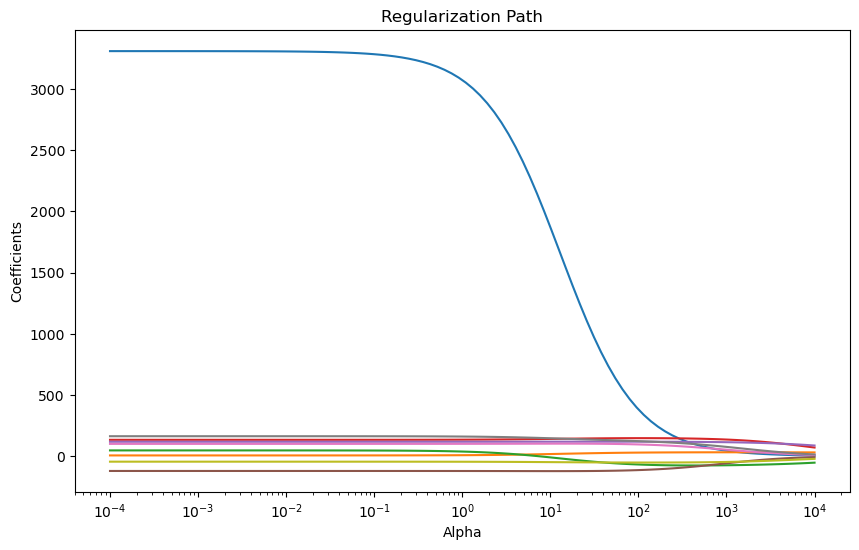

In [33]:
alphas = np.logspace(-4, 4, 100)
coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Regularization Path')
plt.show()


At low alpha values, the model is complex, with larger coefficients that may lead to overfitting. As alpha increases, the model's complexity is reduced, and the coefficients shrink. This helps generalize the model better to unseen data. The goal is to find an alpha that finds the right balance between bias and variance preventing both overfitting and underfitting.

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Hyperparameter tuning</h4>
</div>

I will perform hyper parameter tuning focusing on 2 things. R2 and MAE. i will test both metrics with grid search and see the diifferences.

In [35]:
# Define the grid of hyperparameters to search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'],
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Define custom scoring for MAE and R2
scoring = {
    'r2': make_scorer(r2_score),  # Optimizing for R2
    'mae': make_scorer(mean_absolute_error, greater_is_better=False)  # Minimizing MAE
}


In [36]:
# GridSearchCV using R2 as the primary metric
grid_search = GridSearchCV(model_ridge,param_grid,cv=5,scoring=scoring,refit='r2', verbose=2,n_jobs=-1)


grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best R² (refit):", grid_search.best_score_)

# Extract MAE of the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) of Best Model:", mae_ridge)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'alpha': 0.001, 'max_iter': 1000, 'solver': 'lsqr', 'tol': 0.0001}
Best R² (refit): 0.7283868976571716
Mean Absolute Error (MAE) of Best Model: 342.1983984529323


Focusing on R2, we get a could fitting, but we can see that our MAE has bearly improved. 

In [38]:
#GridSearchCV using MAE as the primary metric
grid_search = GridSearchCV(model_ridge,param_grid,cv=5,scoring=scoring,refit='mae', verbose=2,n_jobs=-1)


grid_search.fit(X_train, y_train)

#the best hyperparameters (based on MAE)
print("Best Hyperparameters:", grid_search.best_params_)

# Print the cross-validated MAE and R2 for the best model
best_index = grid_search.best_index_
print("Best Cross-validated MAE:", -grid_search.cv_results_['mean_test_mae'][best_index])  # Negate MAE to make it positive
print("Best Cross-validated R2:", grid_search.cv_results_['mean_test_r2'][best_index])

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)

print("Test Mean Absolute Error (MAE):", mae_ridge)
print("Test R²:", r2_ridge)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'alpha': 0.001, 'max_iter': 1000, 'solver': 'lsqr', 'tol': 0.0001}
Best Cross-validated MAE: 342.70753395755685
Best Cross-validated R2: 0.7283868976571716
Test Mean Absolute Error (MAE): 342.1983984529323
Test R²: 0.6403581345126552


We can clearly see that the MAE has bearly moved. It seems like we can no further improve the model Ridge. 

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Closer look</h4>
</div>


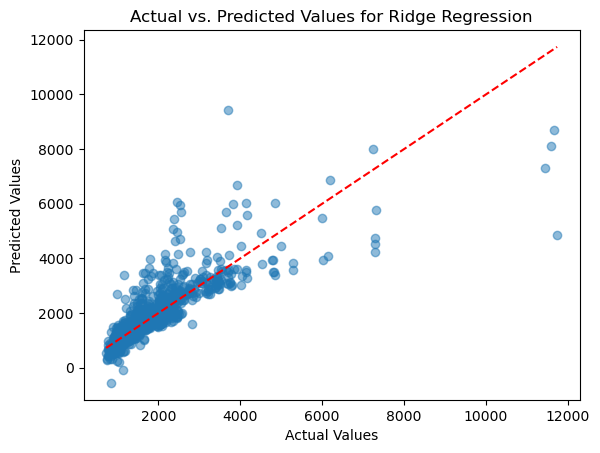

In [41]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Ridge Regression')
plt.show()

The trend seems acceptable but could still be further improved. Let's try to do that using Lasso regression

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Lasso Regression (Stage 2-3) </h4>
</div>

Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that includes L1 regularization as part of the model. This regularization technique helps prevent overfitting and can perform feature selection by shrinking some coefficients to exactly zero, effectively removing less important features from the model. (Ridge does not eliminate features)

Same as for ridge, In stage 2 it did not improve the results we got from simple linear regression. For that reason, in Stage 3, I added some feature engineering by creating a volume column, in attempt to add some linear relationship between the features (weight and volume).

**The important Hyperparameters**:
- alpha: This is the regularization strength parameter. Low alpha (close to 0) makes the model behaves like a regular Linear Regression model with minimal regularization. a high alpha pernalizes significantly and may lead to a more biased model that may underfit.
- fit_intercept: Specifies whether to calculate the intercept for the model. If set to False, the data is expected to be centered.
- normalize: When True, the regressors X are normalized before fitting. This is useful when features have different scales.
- max_iter: The maximum number of iterations for the solver to converge.
- tol: the tolerance for the optimization. Smaller values mean more precision but longer convergence time.
- selection: The strategy used to choose the coefficient updates during the iterative fitting process.

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Simple implementation</h4>
</div>

In [44]:
model_lasso = Lasso(random_state=42) 

# Train the model
model_lasso.fit(X_train, y_train)

# Predict on test data
y_pred = model_lasso.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)
mae_lasso = mean_absolute_error(y_test, y_pred)

# Print the metrics
print('Mean Squared Error (MSE):', mse_lasso)
print('Mean Absolute Error (MAE):', mae_lasso)
print('R-squared:', r2_lasso)


Mean Squared Error (MSE): 391677.09702355467
Mean Absolute Error (MAE): 342.571864326711
R-squared: 0.6415626127663064


Using a very basic implementation, we still get the same results as linear regression and Ridge. lets attempt to improve it. Let's look into the feature selecting process. 

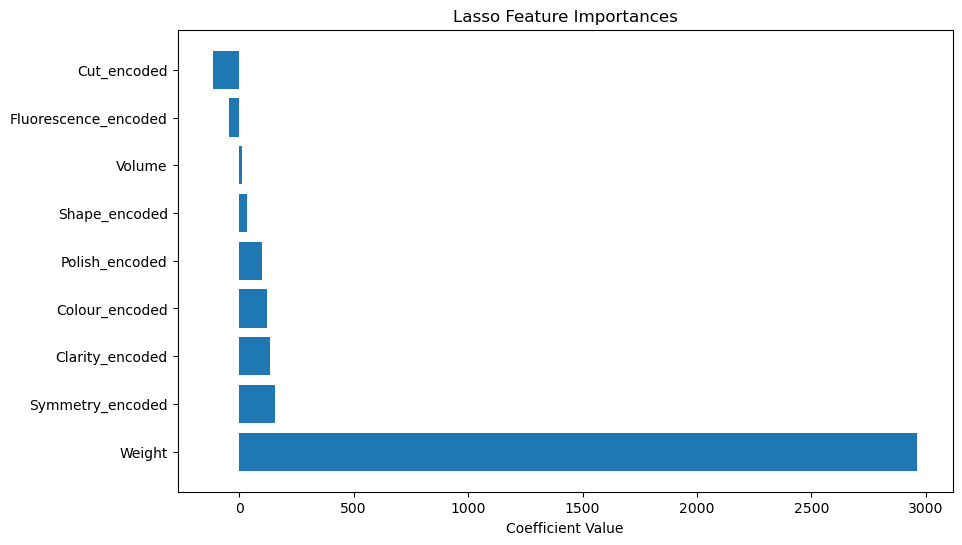

In [46]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_lasso.coef_
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Coefficient Value')
plt.title('Lasso Feature Importances')
plt.show()


These values vary between "expected" and "unexpected". The weight being the most improtant feature is highly expected as we saw the weight highly influences the price of a diamond. We also saw that the data is highly imbalanced for the fluorecences feature which makes this column irrelevant for the predicitons (70% of its data is the same category). What is unexpected is the color feature not being as important as i thought it would be. It is very important to note that our attempt at introducing Volume doesn't seem very good as this feature is ranked by Lasso as the least important amongst all. 

We can however still try to improve it using tradional methods like parameters tuning.

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Hyperparameter Tunning</h4>
</div>

the hyperparameters to focus On are alpha which is most important hyperparameter to tune, as it directly controls the amount of regularization.
the max iterations to ensure the solver has enough iterations to converge, especially if using alpha values close to zero. 

In [48]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'max_iter': [1000, 5000, 10000],          # Number of iterations
    'tol': [1e-3, 1e-4, 1e-5]                 # Tolerance for optimization
}

scoring = {
    'r2': make_scorer(r2_score),  # Optimizing for R2
    'mae': make_scorer(mean_absolute_error, greater_is_better=False)  # Minimizing MAE
}


#GridSearchCV using MAE as the primary metric
grid_search = GridSearchCV(model_lasso,param_grid,cv=5,scoring=scoring,refit='mae', verbose=2,n_jobs=-1)

grid_search.fit(X_train, y_train)

#the best hyperparameters (based on MAE)
print("Best Hyperparameters:", grid_search.best_params_)

# Print the cross-validated MAE and R2 for the best model
best_index = grid_search.best_index_
print("Best Cross-validated MAE:", -grid_search.cv_results_['mean_test_mae'][best_index])  # Negate MAE to make it positive
print("Best Cross-validated R2:", grid_search.cv_results_['mean_test_r2'][best_index])

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)
mse_lasso = mean_squared_error(y_test, y_pred)

print("Test Mean Absolute Error (MAE):", mae_lasso)
print("Test R²:", r2_lasso)
print('Mean Squared Error (MSE):', mse_lasso)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'alpha': 1, 'max_iter': 1000, 'tol': 0.001}
Best Cross-validated MAE: 342.5426005768116
Best Cross-validated R2: 0.7281459267375257
Test Mean Absolute Error (MAE): 342.2888880960509
Test R²: 0.6413941217611281
Mean Squared Error (MSE): 391861.2130508814


We get almost the exact same results as Ridge Regression. Let us take a quick look to verify the fitting of the model on our data to make sure there is no overfitting nor underfitting. 

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Cross-validation</h4>
</div>

In [50]:
results = cross_validate(best_model, X_train, y_train, cv=5, return_train_score = True)
print("R2: " + str(results["train_score"].mean()))
print("OSR2: " + str(results["test_score"].mean()))

R2: 0.7294493315023001
OSR2: 0.7281459267375257


As there result state clearly, the model is neither overfitting nor underfitting. 

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Linear models conclusion (stage 3)</h4>
</div>

Our attempt at using linear models and improving wasn't very succesfull. As we can see, despite efforts of feature selection and hyperparameter tuning and additional feature engineering did not allow us to improve the performances. Cross-validation has helped us rule out the possibility of overfitting and underfitting. These all led me to the conclusion that this is the best results i can get with linear models, and it was expected as we saw clearly that there are no linear relationships between our features. 

Our study so far has allowed to demonstrate the poor performance of linear models on non-linear data. Lasso and Ridge regression, like linear regression, are all linear models and inherently assume a linear relationship between the independent variables and the target.

MAE SCORE ~ 342

<div style="background-color:#FFFF00; padding:5px; border-radius:3px; text-align:center">
    <h2 style="color:#000080;">Tree-based models</h2>
</div>

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Desicion Tree Regressor (Stage 1)</h4>
</div>

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Simple implementation</h4>
</div>

In [56]:
# Create the Decision Tree Regressor model
model_DT = DecisionTreeRegressor(random_state=42)  # we will set the random state to avoid getting different results everytime we run the code.

# Train the model
model_DT.fit(X_train, y_train)

# Predict on test data
y_pred = model_DT.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)
mae_dt = mean_absolute_error(y_test, y_pred)

# Print the metrics
print('Mean Squared Error (MSE):', mse_dt)
print('Mean Absolute Error (MAE):', mae_dt)
print('R-squared:', r2_dt)


Mean Squared Error (MSE): 343296.3784144749
Mean Absolute Error (MAE): 193.65860412926392
R-squared: 0.6858374976204602


We directly notice that the MSE went down, indicating that this model handels outliers better. the R2 score went up and the MAE lowered considerably. From the first glance, we can see that the Decision Tree Regressor performs better than the linear regression model. The main reason could be that the features don't have a linear relationship and DTR can model complex non-linear relationships between features and the target variable. 

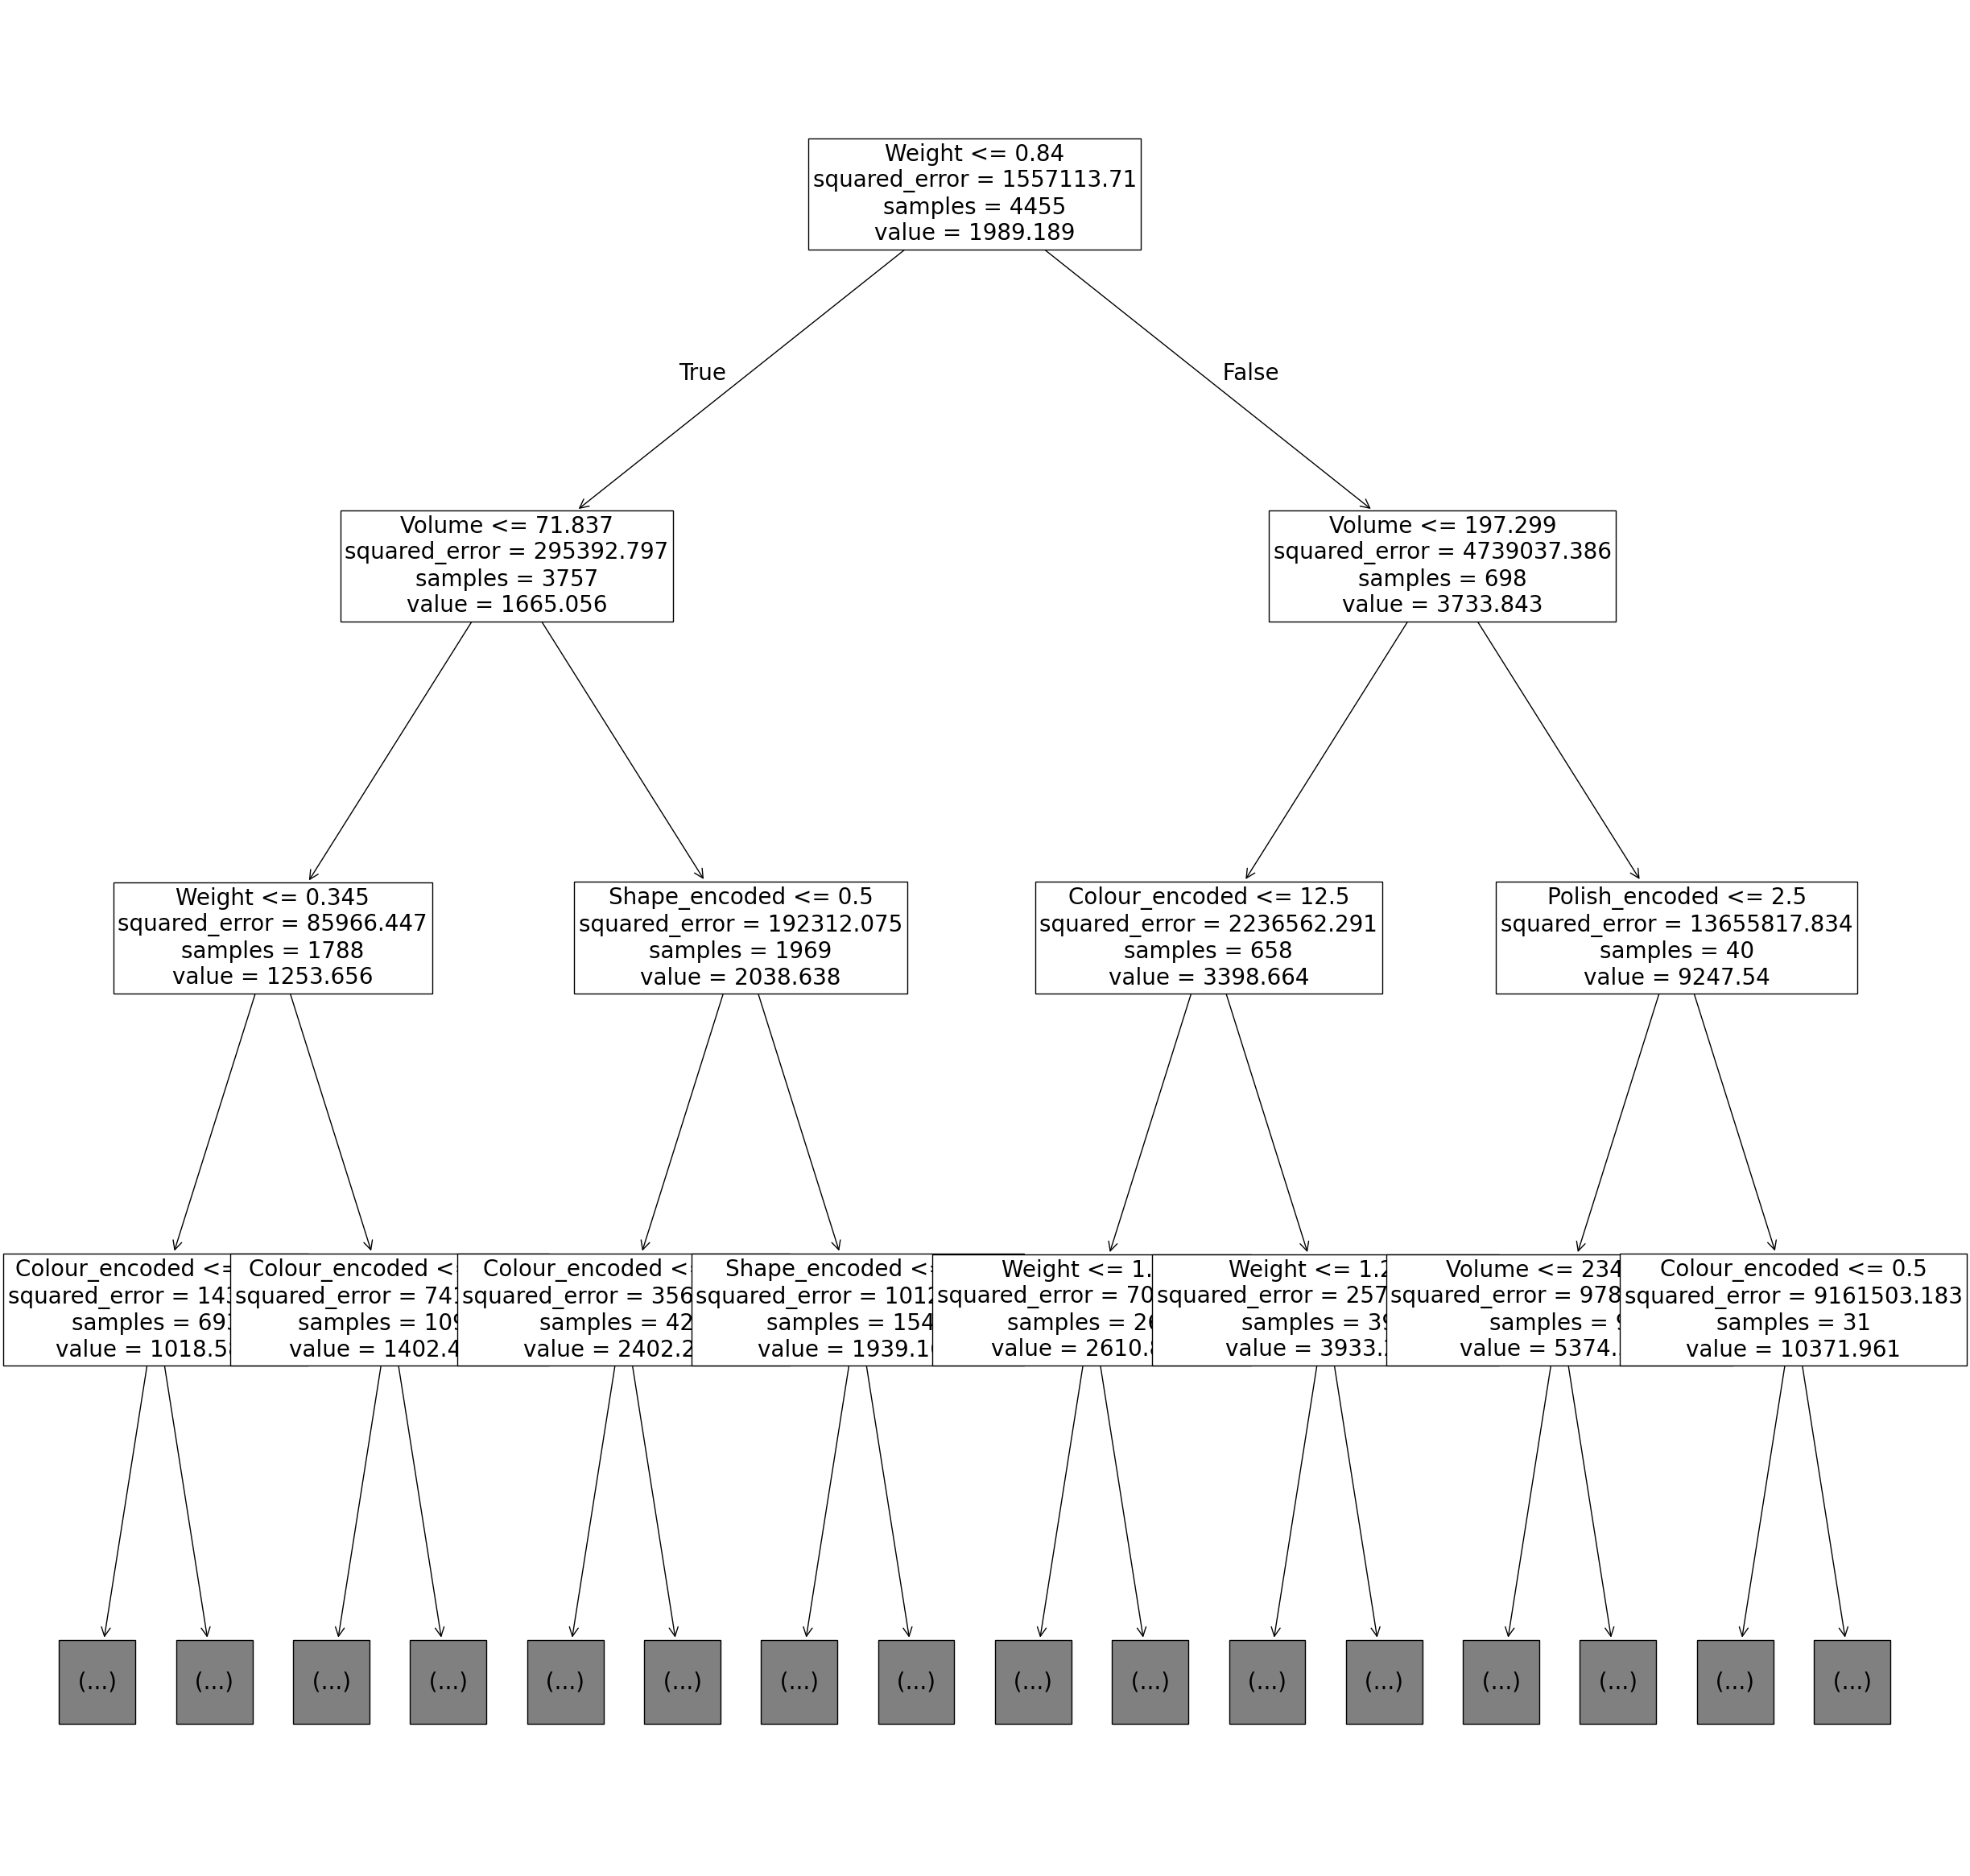

In [58]:
plt.figure(figsize=(30, 30))
ax = plot_tree(model_DT, feature_names=X_train.columns, fontsize=20, max_depth=3)

# Display the plot
plt.show()


In [59]:
ft_importance = pd.DataFrame({
    "feature": X_train.columns,  # Use all features in X_train
    "importance": model_DT.feature_importances_
}).sort_values("importance", ascending=False)

# Print the total number of features
print(ft_importance.shape[0])

# Display the feature importance DataFrame
ft_importance


9


,feature,importance
0,Weight,0.428505
1,Volume,0.336247
4,Colour_encoded,0.124969
3,Clarity_encoded,0.044795
6,Polish_encoded,0.029312
2,Shape_encoded,0.017147
8,Fluorescence_encoded,0.012160
7,Symmetry_encoded,0.004522
5,Cut_encoded,0.002343


The feature importances ranks changed compare to how they were ranked using linear models (lasso). It is expected that the most important feature is Weight and Volume.

The problem with DTR is that they can easily overfit the data. we can try to improve our model with hyperparameter tunning and verify overfitting.

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Hyperparameter Tunning</h4>
</div>

Here are the parameters i will focus on:

- **max_depth**: This limits how deep the tree can grow and helps to control overfitting
- **min_samples_split**: The minimum number of samples required to split an internal node.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. this can smooth the model because leaf nodes have enough data.
- **max_features**:  The number of features to consider when looking for the best split.
- **criterion**: This parameter determines the function used to measure the quality of a split.
- **ccp_alpha**:  **Pruning** cuts off some of the extra branches that don't add much value, making the tree simpler and more general. This helps the tree make better and more reliable predictions for new data. It's like removing unnecessary parts so the tree can focus on the most important decisions. For pruning, we can control the **complexity parameter** which controls the trade-off between the complexity of the tree and its performance.

I will use GridSearch based on r2 and mae to check the differences. we want to prevent overfitting but also get a good MAE test score.  

In [64]:
# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [15, 20, 25, 30, 35, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['mse', 'friedman_mse'],
    'ccp_alpha': [0.0, 0.0001, 0.001, 0.01]  # Add more if needed
}

scoring = {
    'r2': make_scorer(r2_score),  # Optimizing for R2
    'mae': make_scorer(mean_absolute_error, greater_is_better=False)  # Minimizing MAE
}

In [65]:
# GridSearchCV using R2 as the primary metric
grid_search = GridSearchCV(model_DT,param_grid,cv=5,scoring=scoring,refit='r2', verbose=2,n_jobs=-1)


grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best R² (refit):", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)
mse_dt = mean_squared_error(y_test, y_pred)

print("Test Mean Absolute Error (MAE):", mae_dt)
print("Test R²:", r2_dt)
print('Mean Squared Error (MSE):', mse_dt)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Best Hyperparameters: {'ccp_alpha': 0.01, 'criterion': 'friedman_mse', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R² (refit): 0.8136619861252752
Test Mean Absolute Error (MAE): 183.78844454062298
Test R²: 0.7714238569078186
Mean Squared Error (MSE): 249773.1636371289


In [66]:
#GridSearchCV using MAE as the primary metric
grid_search = GridSearchCV(model_DT,param_grid,cv=5,scoring=scoring,refit='mae', verbose=2,n_jobs=-1)

grid_search.fit(X_train, y_train)

#the best hyperparameters (based on MAE)
print("Best Hyperparameters:", grid_search.best_params_)

# Print the cross-validated MAE and R2 for the best model
best_index = grid_search.best_index_
print("Best Cross-validated MAE:", -grid_search.cv_results_['mean_test_mae'][best_index])  # Negate MAE to make it positive
print("Best Cross-validated R2:", grid_search.cv_results_['mean_test_r2'][best_index])

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)
mse_dt = mean_squared_error(y_test, y_pred)

print("Test Mean Absolute Error (MAE):", mae_dt)
print("Test R²:", r2_dt)
print('Mean Squared Error (MSE):', mse_dt)


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Best Hyperparameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Cross-validated MAE: 202.9227306357004
Best Cross-validated R2: 0.805656759834336
Test Mean Absolute Error (MAE): 183.85320906120913
Test R²: 0.7683498281724901
Mean Squared Error (MSE): 253132.26258747198


After performing Hyperparameter tunning, we were able to  lower our MAE and MSE score (a little) and increase our R2 score. The DTR model proved to be considerable better than simple linear Regression. We can check to see if it overfitted or not. 

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Cross-validation</h4>
</div>

In [68]:
results = cross_validate(best_model, X_train, y_train, cv=5, return_train_score = True)
print("R2: " + str(results["train_score"].mean()))
print("OSR2: " + str(results["test_score"].mean()))

R2: 0.9278001868579961
OSR2: 0.805656759834336


There is cosiderable Overfitting with a 12% difference between R2 and OSR2. Maybe other models could perform better.

After performing Hyperparameter tunning, we were able to significantly lower our MSE score and increase our R2 score. The DTR model proved to be considerable better than simple linear Regression. 

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Random forest regression (Stage 2)</h4>
</div>

Random Forest Regression is a machine learning method that predicts a continuous value (prices in my case) by combining the outputs of multiple decision trees. Each tree in the "forest" is trained on a random subset of the data, and it uses a random selection of features (columns) to make predictions. When making a prediction, the model takes the average of all the individual tree predictions, which helps reduce errors and improves accuracy. Random Forest Regression works well with complex and non-linear relationships, and can handle large datasets with many features.

Random Forest Regression is better than a simple decision tree because it reduces overfitting by combining predictions from multiple trees trained on random subsets of the data. This averaging process makes it more accurate, and less sensitive to noise or changes in the data. By using random subsets of data and features, Random Forest builds diverse trees, which help reduce bias and improve generalization.

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Simple implementation</h4>
</div>

In [73]:
model_rfr = RandomForestRegressor(random_state=42)

model_rfr.fit(X_train, y_train)

y_pred = model_rfr.predict(X_test)

# Evaluate the model
mse_rfr = mean_squared_error(y_test, y_pred)
r2_rfr = r2_score(y_test, y_pred)
mae_rfr = mean_absolute_error(y_test, y_pred)

# Print the metrics
print('Mean Squared Error (MSE):', mse_rfr)
print('Mean Absolute Error (MAE):', mae_rfr)
print('R-squared:', r2_rfr)

Mean Squared Error (MSE): 195065.74630538045
Mean Absolute Error (MAE): 152.13219785073096
R-squared: 0.82148852466529


At first glance, Higher R2 test score and lower MSE and MAE than DTR without parameter tuning. let's check if it consider the same feature importances

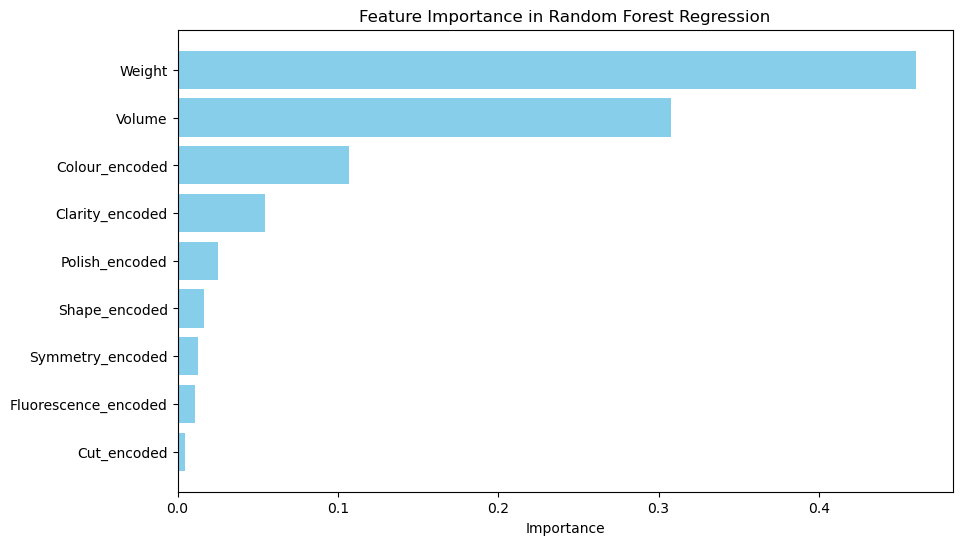

In [75]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_rfr.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Regression')
plt.gca().invert_yaxis()
plt.show()


It is similar to a simple decision Tree

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Hyperparameter Tunning</h4>
</div>

Parameters to tune taking into consideration the size of our dataset:
:

- n_estimators: Number of decision trees in the forest. Higher values generally improve accuracy but increase computation time.
- max_depth: Maximum depth of each tree. (Depth 10 or 20: Suitable for avoiding overfitting.Depth 30 for capturing more complex interactions)
- min_samples_split: Minimum number of samples required to split a node. A low value like 2 allows nodes to split even with a small number of samples, potentially overfitting. Higher values enforce stricter splits, reducing overfitting by requiring more data at each node.
- min_samples_leaf: Minimum number of samples required in a leaf.
- max_features: Number of features considered for splitting at each node.

In [79]:
param_grid = {
    'n_estimators': [100, 200, 300],           
    'max_depth': [None, 10, 20, 30],            
    'min_samples_split': [2, 5, 10],            
    'min_samples_leaf': [1, 2, 4],              
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state' : [42]
}

scoring = {
    'r2': make_scorer(r2_score),  # Optimizing for R2
    'mae': make_scorer(mean_absolute_error, greater_is_better=False)  # Minimizing MAE
}

#GridSearchCV using MAE as the primary metric
grid_search = GridSearchCV(model_rfr,param_grid,cv=5,scoring=scoring,refit='mae', verbose=2,n_jobs=-1)


grid_search.fit(X_train, y_train)

#the best hyperparameters (based on MAE)
print("Best Hyperparameters:", grid_search.best_params_)

# Print the cross-validated MAE and R2 for the best model
best_index = grid_search.best_index_
print("Best Cross-validated MAE:", -grid_search.cv_results_['mean_test_mae'][best_index])  # Negate MAE to make it positive
print("Best Cross-validated R2:", grid_search.cv_results_['mean_test_r2'][best_index])

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse_rfr = mean_squared_error(y_test, y_pred)
r2_rfr = r2_score(y_test, y_pred)
mae_rfr = mean_absolute_error(y_test, y_pred)

# Print the metrics
print('Mean Squared Error (MSE):', mse_rfr)
print('Mean Absolute Error (MAE):', mae_rfr)
print('R-squared:', r2_rfr)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}
Best Cross-validated MAE: 175.55842302904347
Best Cross-validated R2: 0.8772017407013986
Mean Squared Error (MSE): 192226.32979860238
Mean Absolute Error (MAE): 166.04831306067015
R-squared: 0.8240869738513463


Without parameter tuning we had a better MAE score, which is weird. However tuning helped lower MSE a little bit and improved R2score. Our model could be overfitting again. let's look into it:

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Cross validation</h4>
</div>

In [81]:
results = cross_validate(best_model, X_train, y_train, cv=5, return_train_score = True)
print("R2: " + str(results["train_score"].mean()))
print("OSR2: " + str(results["test_score"].mean()))

R2: 0.9813820782234431
OSR2: 0.8772017407013986


The model is highly overfitting. Maybe if we manually try to "minimize" this we can maybe identify the problem by focusing on the OOB R2 score.

The Out-of-Bag (OOB) score is a performance metric for ensemble methods like Random Forest. It provides an estimate of the model's generalization performance without the need for a separate validation set.

100%|██████████| 5/5 [00:07<00:00,  1.53s/it]


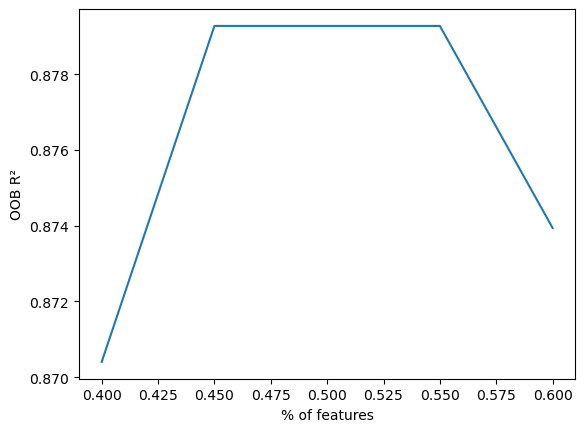

In [83]:
params = []
oob_scores = []
for i in tqdm(range(5)):
    max_ft = 0.4 + i/20
    params.append(max_ft)
    rfr = RandomForestRegressor(oob_score = True, max_features = max_ft, n_estimators= 100, random_state=42)
    rfr.fit(X_train, y_train)
    oob_scores.append(rfr.oob_score_)
    
ax=plt.plot(params, oob_scores)
ax=plt.xlabel("% of features")
ax=plt.ylabel("OOB R²")

In [84]:
model_rfr = RandomForestRegressor(max_features=0.5, n_estimators= 100, random_state=42)

model_rfr.fit(X_train, y_train)

y_pred = model_rfr.predict(X_test)

# Evaluate the model
mse_rfr = mean_squared_error(y_test, y_pred)
r2_rfr = r2_score(y_test, y_pred)
mae_rfr = mean_absolute_error(y_test, y_pred)

# Print the metrics
print('Mean Squared Error (MSE):', mse_rfr)
print('Mean Absolute Error (MAE):', mae_rfr)
print('R-squared:', r2_rfr)

Mean Squared Error (MSE): 189749.82950579195
Mean Absolute Error (MAE): 158.66086978114046
R-squared: 0.8263533057384648


In [85]:
results = cross_validate(model_rfr, X_train, y_train, cv=5, return_train_score = True)
print("R²: " + str(results["train_score"].mean()))
print("OSR²: " + str(results["test_score"].mean()))

R²: 0.9811165907322931
OSR²: 0.8766656869137439


By doing some manual tuning, we are getting results in terms of perfomance (MAE and MSE are lower than with gridsearch). I made sue to include default values in my parameters grid but still manual tuning seems to give better results. 

However, the overfitting issue still persists. Let's check with XGBoost.

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">XGBoost Regression (stage 2)</h4>
</div>

XGBoost Regression is a machine learning method that predicts a continuous value (such as prices) using an ensemble of decision trees, built sequentially to correct the errors of previous trees. Unlike Random Forest, which trains trees independently, XGBoost uses a process called gradient boosting, where each new tree focuses on minimizing the errors (residuals) made by the earlier trees. This iterative approach makes XGBoost highly efficient and accurate. It also uses techniques like learning rate, regularization, and subsampling to prevent overfitting and handle complex, non-linear relationships in data. 

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Simple implementation</h4>
</div>

In [88]:
model_xgb= xgb.XGBRegressor(random_state=42)

model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)
mae_xgb = mean_absolute_error(y_test, y_pred)

# Print the metrics
print('Mean Squared Error (MSE):', mse_xgb)
print('Mean Absolute Error (MAE):', mae_xgb)
print('R2:', r2_xgb)

Mean Squared Error (MSE): 247379.3788938886
Mean Absolute Error (MAE): 157.3639529435382
R2: 0.7736144929074398


its performance its relatively similar to RFR.

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Hyperparameter Tuning</h4>
</div>

Taking into consideration the size of our dataset:

- n_estimators: Number of boosting rounds
- learning_rate: Shrinks contribution of each tree (A dataset with 5k rows and 10 features is not extremely large, so moderate learning rates like 0.1 are reasonable. Including 0.01 ensures you capture cases where gradual learning improves performance.)
- max_depth: Maximum depth of each tree (Depth 3 or 5: Suitable for avoiding overfitting.Depth 7 for capturing more complex interactions)
- subsample: Fraction of samples used for training ( the dataset has about 5k rows, which isn't extremely large, so limiting the subsample to 80% (0.8) introduces randomness while still keeping enough data for robust training.)
- colsample_bytree: Fraction of features used per tree (With only 10 features, setting colsample_bytree to values below 0.8 might discard too much information, so this range is reasonable.)


In [91]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Shrinks contribution of each tree
    'max_depth': [3, 5, 7, 10],             # Maximum depth of each tree
    'subsample': [0.8, 1.0],            # Fraction of samples used for training
    'colsample_bytree': [0.8, 1.0]      # Fraction of features used per tree
}

#GridSearchCV using MAE as the primary metric
grid_search = GridSearchCV(model_xgb,param_grid,cv=5,scoring=scoring,refit='mae', verbose=2,n_jobs=-1)


grid_search.fit(X_train, y_train)

#the best hyperparameters (based on MAE)
print("Best Hyperparameters:", grid_search.best_params_)

# Print the cross-validated MAE and R2 for the best model
best_index = grid_search.best_index_
print("Best Cross-validated MAE:", -grid_search.cv_results_['mean_test_mae'][best_index])  # Negate MAE to make it positive
print("Best Cross-validated R2:", grid_search.cv_results_['mean_test_r2'][best_index])

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)
mae_xgb = mean_absolute_error(y_test, y_pred)

# Print the metrics
print('Mean Squared Error (MSE):', mse_xgb)
print('Mean Absolute Error (MAE):', mae_xgb)
print('R2:', r2_xgb)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-validated MAE: 157.71352872639153
Best Cross-validated R2: 0.8962297924313175
Mean Squared Error (MSE): 181337.7019506631
Mean Absolute Error (MAE): 144.2699190697935
R2: 0.8340515373809333


With GridSearch, we got a better MAE and MSE. 

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Cross validation</h4>
</div>

In [94]:
results = cross_validate(best_model, X_train, y_train, cv=5, return_train_score = True)
print("R²: " + str(results["train_score"].mean()))
print("OSR²: " + str(results["test_score"].mean()))

R²: 0.9962371680471869
OSR²: 0.8962297924313175


Same as with RFR, our cross validation shows important overfitting with the model. Let's manually look into some features and how they affect our validation and training scores

100%|██████████| 5/5 [00:12<00:00,  2.50s/it]


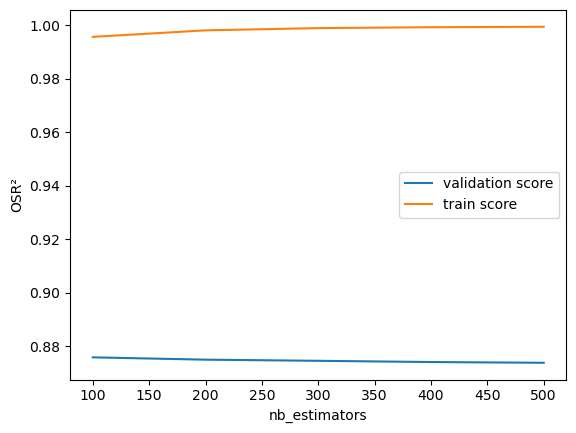

In [96]:
train_scores = []
validation_scores = []
nb_estimators = []
#tqdm: bibliothèque pour afficher une barre de progression pour la boucle, ce qui facilite le suivi de l'avancement.
for n in tqdm([100,200,300,400,500]):
    nb_estimators.append(n)
    XGB= xgb.XGBRegressor(n_estimators=n)
    resultats = cross_validate(XGB, X_train, y_train, cv=5, return_train_score = True)
    train_scores.append(resultats["train_score"].mean())
    validation_scores.append(resultats["test_score"].mean())

ax=plt.plot(nb_estimators, validation_scores)
ax=plt.plot(nb_estimators, train_scores)
ax=plt.legend(["validation score", "train score"])
ax=plt.xlabel("nb_estimators")
ax=plt.ylabel("OSR²")

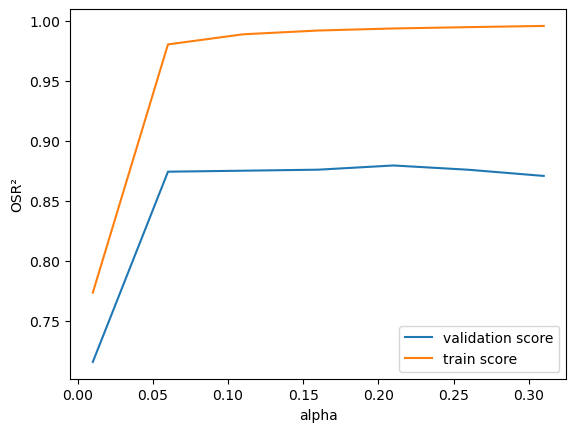

In [97]:
train_scores = []
validation_scores = []
alphas = []
#tqdm: bibliothèque pour afficher une barre de progression pour la boucle, ce qui facilite le suivi de l'avancement.
for i in range(1, 35, 5):
    alpha=i/100
    alphas.append(alpha)
    XGB= xgb.XGBRegressor(n_estimators=100, learning_rate=alpha)
    resultats = cross_validate(XGB, X_train, y_train, cv=5, return_train_score = True)
    train_scores.append(resultats["train_score"].mean())
    validation_scores.append(resultats["test_score"].mean())

ax=plt.plot(alphas, validation_scores)
ax=plt.plot(alphas, train_scores)
ax=plt.legend(["validation score", "train score"])
ax=plt.xlabel("alpha")
ax=plt.ylabel("OSR²")

We can see that the GAP between Validation score R2 and train Score OSR2 persists indepentantly of the parameters chosen. This could simply means that this model isn't very suitable for our dataset.

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">So far Conclusion and Next Steps</h4>
</div>

<h4 font-size:18px; "> RFR and XGBoost performed better than simple decision tree regressor. we got a better R2 test score and significantly lower MSE and MAE than with DTR
 </h4>


<h4 font-size:18px; ">However, we noticed extreme overfitting with both models, with almost 10% difference in the test ans training r2 scores. After some research, i learned that RFR and XGBoost struggle with datasets containing many categorical variables because they require numeric inputs, which often leads to inefficiencies or loss of information during encoding. Also, Decision trees (used in RFR and XGBoost) tend to overfit to categories with very few occurrences and as we saw in our analysis there are alot of imbalanced data in our columns</h4>

<h4 font-size:18px; ">For the next step, I will attempt to Use Categorical-Handling Libraries like LightGBM or CatBoost. These models natively handle categorical features without requiring encoding.</h4>



<div style="background-color:#FF0000; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#FFFFFF; font-size:18px; margin:0;">Stage 3:</h4>
</div>


<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">LightGMB (stage 3)</h4>
</div>

LightGBM (Light Gradient Boosting Machine) is a machine learning algorithm designed for speed and efficiency. It's an ensemble learning method based on decision trees, and it performs gradient boosting, which improves a model iteratively by reducing errors from previous iterations. It builds trees leaf-wise (instead of level-wise like most other tree-based algorithms), which speeds up computation and improves accuracy. It can deal with encoded categorical variables directly.

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Simple implementation</h4>
</div>


In [101]:
# Initialize LightGBM Regressor
model_lgbm = LGBMRegressor(random_state=42)

# Fit the model
model_lgbm.fit(X_train, y_train)

# Predict on test set
y_pred = model_lgbm.predict(X_test)


# Evaluate the model
mse_lgbm = mean_squared_error(y_test, y_pred)
r2_lgbm = r2_score(y_test, y_pred)
mae_lgbm = mean_absolute_error(y_test, y_pred)

# Print the metrics
print('Mean Squared Error (MSE):', mse_lgbm )
print('Mean Absolute Error (MAE):', mae_lgbm )
print('R2:', r2_lgbm )

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 4455, number of used features: 9
[LightGBM] [Info] Start training from score 1989.189305
Mean Squared Error (MSE): 162004.45248647593
Mean Absolute Error (MAE): 151.8272767247803
R2: 0.8517440690028772


The model performs much better than the other ones we tested with the lowest MSE score so far without tuning. Lets check if the model is overfitting or underfitting. We can do that by looking into the learning curve. 

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Hyperparameter tuning</h4>
</div>

parameters considering dataset size:

- n_estimators: Number of Boosting Rounds. Controls the number of decision trees built in the boosting process. Lower values reduce training time but might underfit.
- learning_rate: Shrinks the Contribution of Each Tree. A smaller learning rate requires more boosting rounds (n_estimators) but improves generalization. Higher values speed up training but might overfit.
- max_depth: Maximum Depth of Each Tree
- num_leaves: Maximum Leaves per Tree. Controls the number of leaf nodes per tree, directly influencing the model's complexity. Larger values increase model complexity and the risk of overfitting.
- subsample: Fraction of Samples Used per Tree
- colsample_bytree: Fraction of Features Used per Tree.

In [103]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [15, 31, 63, 127],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

#GridSearchCV using MAE as the primary metric
grid_search = GridSearchCV(model_lgbm,param_grid,cv=5,scoring=scoring,refit='mae', verbose=2,n_jobs=-1)


grid_search.fit(X_train, y_train)

#the best hyperparameters (based on MAE)
print("Best Hyperparameters:", grid_search.best_params_)

# Print the cross-validated MAE and R2 for the best model
best_index = grid_search.best_index_
print("Best Cross-validated MAE:", -grid_search.cv_results_['mean_test_mae'][best_index])  # Negate MAE to make it positive
print("Best Cross-validated R2:", grid_search.cv_results_['mean_test_r2'][best_index])

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse_lgbm = mean_squared_error(y_test, y_pred)
r2_lgbm = r2_score(y_test, y_pred)
mae_lgbm = mean_absolute_error(y_test, y_pred)

# Print the metrics
print('Mean Squared Error (MSE):', mse_lgbm )
print('Mean Absolute Error (MAE):', mae_lgbm )
print('R2:', r2_lgbm )

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 4455, number of used features: 9
[LightGBM] [Info] Start training from score 1989.189305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

Tuning bearly lowered the MSE and MAE scores. R2 score stayed relatively stable. 

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Learning curve nd cross validation</h4>
</div>


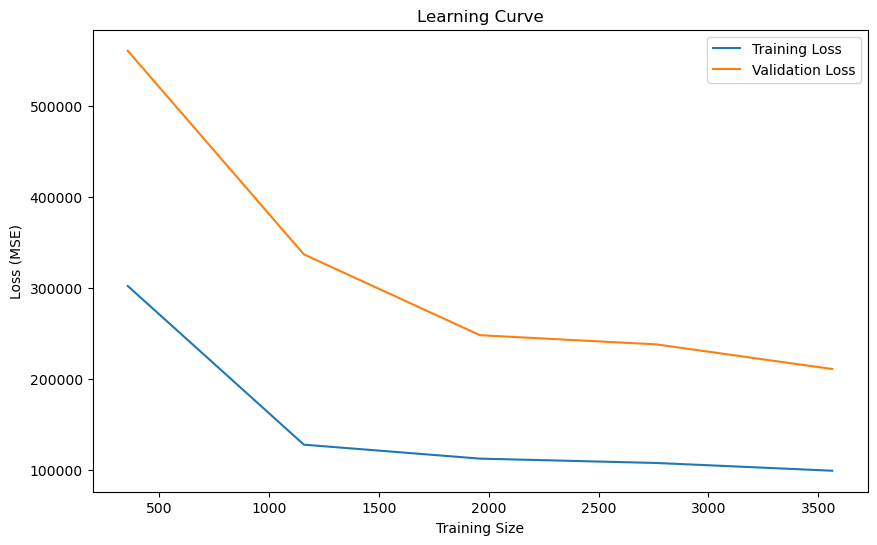

In [111]:
# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    model_lgbm, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Convert negative scores to positive for MSE
train_scores_mean = -np.mean(train_scores, axis=1)
validation_scores_mean = -np.mean(validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Loss')
plt.plot(train_sizes, validation_scores_mean, label='Validation Loss')
plt.xlabel('Training Size')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [112]:
results = cross_validate(model_lgbm, X_train, y_train, cv=5, return_train_score = True)
print("R²: " + str(results["train_score"].mean()))
print("OSR²: " + str(results["test_score"].mean()))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 3564, number of used features: 9
[LightGBM] [Info] Start training from score 1990.464523
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 3564, number of used features: 9
[LightGBM] [Info] Start training from score 1985.618615
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

We can spot some more overfitting but the gap is smaller with about 7% difference for r2 and OSR2. 

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">CatBoost (stage 3)</h4>
</div>

CatBoost (Categorical Boosting) is a gradient boosting framework specifically designed to handle categorical features natively, without requiring extensive preprocessing like one-hot encoding. It is highly optimized for both speed and accuracy. Unlike traditional boosting algorithms that calculate splits on all the data at once, CatBoost uses subsets of data in a sequential manner, reducing target leakage and enhancing robustness. 

What sets CatBoost apart from other frameworks like XGBoost or LightGBM is its native handling of categorical features, reducing preprocessing time and improving performance when categorical variables are present. It also employs symmetric trees, which ensure balanced and interpretable models while maintaining competitive accuracy. These unique features make CatBoost especially advantageous for datasets with mixed numerical and categorical data, while still offering comparable or superior performance to other gradient boosting frameworks in a wide range of applications.

In my case seeing as the columns are already encoded, we will keep it this way but verify if this model still helps.

In [115]:
# Initialize the CatBoost Regressor
model_cat = CatBoostRegressor(random_state = 42, verbose = 0) #verbose = 0 to avoid extensive printing while runing like lgbm. 

# Train the model
model_cat.fit(X_train, y_train)

# Predict on test data
y_pred = model_cat.predict(X_test)

# Evaluate the model
mse_cat = mean_squared_error(y_test, y_pred)
r2_cat = r2_score(y_test, y_pred)
mae_cat = mean_absolute_error(y_test, y_pred)

# Print the metrics
print('Mean Squared Error (MSE):', mse_cat )
print('Mean Absolute Error (MAE):', mae_cat )
print('R2:', r2_cat )

Mean Squared Error (MSE): 154541.6061504768
Mean Absolute Error (MAE): 144.1720417760608
R2: 0.8585735802567385


Best model so far, with the lowest MSE AND MAE, and highest R2 without tuning and further improvements. 

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Hyperparameter tuning</h4>
</div>

parameters considering dataset size:

- learning_rate 
- n_estimators
- depth 
- l2_leaf_reg (L2 Regularization Coefficient) : Controls the strength of L2 regularization applied to leaf values. A range from 1 to 10 covers common regularization strengths for preventing overfitting without significantly affecting model performance.
- bagging_temperature (Control Overfitting with Sampling) : Controls the randomness of row sampling during training. Lower values use deterministic sampling, while higher values increase randomness, helping with overfitting.
- min_data_in_leaf (Minimum Samples per Leaf) : Specifies the minimum number of data points required in a leaf.  Higher values create smoother models by reducing leaf granularity.

In [141]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0, 1, 2, 5],
    'min_data_in_leaf': [5, 10],
}

#GridSearchCV using MAE as the primary metric
grid_search = GridSearchCV(model_cat,param_grid,cv=5,scoring=scoring,refit='mae', verbose=2,n_jobs=-1)


grid_search.fit(X_train, y_train)

#the best hyperparameters (based on MAE)
print("Best Hyperparameters:", grid_search.best_params_)

# Print the cross-validated MAE and R2 for the best model
best_index = grid_search.best_index_
print("Best Cross-validated MAE:", -grid_search.cv_results_['mean_test_mae'][best_index])  # Negate MAE to make it positive
print("Best Cross-validated R2:", grid_search.cv_results_['mean_test_r2'][best_index])

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse_cat = mean_squared_error(y_test, y_pred)
r2_cat = r2_score(y_test, y_pred)
mae_cat = mean_absolute_error(y_test, y_pred)

# Print the metrics
print('Mean Squared Error (MSE):', mse_cat )
print('Mean Absolute Error (MAE):', mae_cat )
print('R2:', r2_cat )

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Hyperparameters: {'bagging_temperature': 0, 'depth': 6, 'l2_leaf_reg': 1, 'learning_rate': 0.1, 'min_data_in_leaf': 5, 'n_estimators': 1000}
Best Cross-validated MAE: 151.0830487056556
Best Cross-validated R2: 0.9035185211350487
Mean Squared Error (MSE): 171061.0124569028
Mean Absolute Error (MAE): 141.44365561571553
R2: 0.8434560947562497


With parameter tuning we further improved the model by minimizing the MAE and MSE.

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Learning curve nd cross validation</h4>
</div>

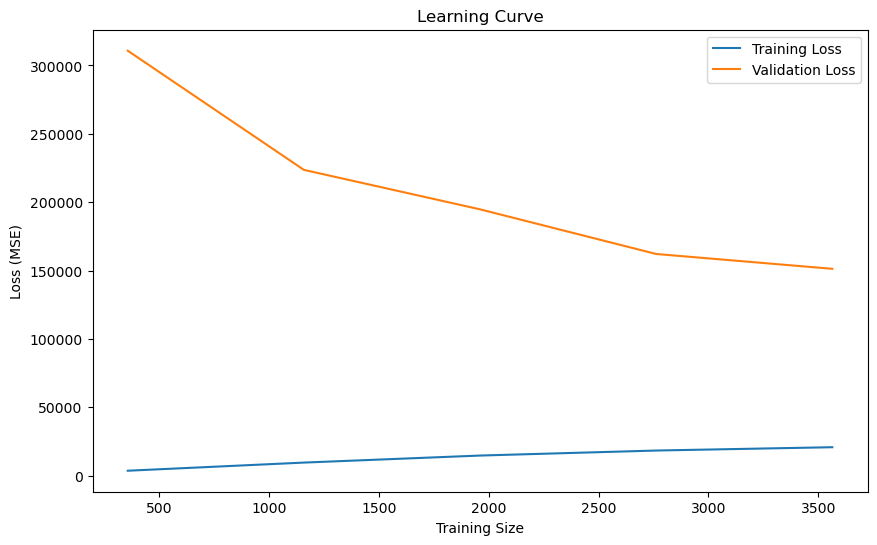

In [144]:
# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    model_cat, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Convert negative scores to positive for MSE
train_scores_mean = -np.mean(train_scores, axis=1)
validation_scores_mean = -np.mean(validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Loss')
plt.plot(train_sizes, validation_scores_mean, label='Validation Loss')
plt.xlabel('Training Size')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [145]:
results = cross_validate(model_cat, X_train, y_train, cv=5, return_train_score = True)
print("R²: " + str(results["train_score"].mean()))
print("OSR²: " + str(results["test_score"].mean()))

R²: 0.9865870640690044
OSR²: 0.9022749325508066


We have good R2 scores. Still overfitting but less (8%) 

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Performance comparaisons (Stage 3)</h4>
</div>

In [212]:
# Define the metrics for each model
data = {
    "Model": [
        "Linear Regression", 
        "Ridge Regression", 
        "Lasso Regression", 
        "Decision Tree", 
        "Random Forest", 
        "XGBoost", 
        "LightGBM", 
        "CatBoost"
    ],
    "MAE": [mae_LR, mae_ridge, mae_lasso, mae_dt, mae_rfr, mae_xgb, mae_lgbm, mae_cat],
    "MSE": [mse_LR, mse_ridge, mse_lasso, mse_dt, mse_rfr, mse_xgb, mse_lgbm, mse_cat],
    "R2": [r2_LR, r2_ridge, r2_lasso, r2_dt, r2_rfr, r2_xgb, r2_lgbm, r2_cat]
}

# Create a DataFrame
model_comparison = pd.DataFrame(data)

# Display the table
model_comparison


,Model,MAE,MSE,R2
0,Linear Regression,342.206652,393008.974105,0.640344
1,Ridge Regression,342.198398,392140.065920,0.640358
2,Lasso Regression,342.288888,391861.213051,0.641394
3,Decision Tree,183.853209,253132.262587,0.768350
4,Random Forest,158.660870,189749.829506,0.826353
5,XGBoost,144.269919,181337.701951,0.834052
6,LightGBM,150.600504,156354.588758,0.856914
7,CatBoost,141.443656,171061.012457,0.843456


As we can see we gradually improved our models' performances. DT, RFR, XGB have a significantly lower MAE compared to the linear models however they tend to overfit alot on our data. LightGBM and Catboost, not only reduced MAE but also reduced overfitting while maitaning a good R2 score. 

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Concluding this task</h4>
</div>


In this third and final stage of the project, we explored new models, **LightGBM** and **CatBoost**, which were not covered in class. Both models are tree-based algorithms, but they stand out due to their ability to handle categorical features efficiently. This advantage was clearly reflected in their performance, as evidenced by the significantly lower **Mean Squared Error (MSE)** scores compared to other models.

Overall, tree-based models consistently outperformed linear regressors, even after extensive efforts to improve the latter through hyperparameter tuning and feature engineering. While hyperparameter tuning provided some improvements, it occasionally led to overfitting, making it challenging to achieve consistent gains. Feature selection was also applied, but further improving the models proved difficult.

Below, we present a summary table of the results, which highlights that **LightGBM** emerged as the best-performing model in this project. Its ability to generalize effectively and produce the lowest MSE makes it the most suitable choice for this dataset.

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px; text-align:center">
    <h2 style="color:#000080;">Quality assessment</h2>
</div>

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Metrics</h4>
</div>

- Accuracy: Ratio of correct predictions to total predictions. This is good for balanced datasets. (we want to maximize this in our case)
- Precision: True positives divided by total positive predictions. This is important when false positives are problematic.
- Recall (Sensitivity): True positives divided by all actual positives. Critical for detecting all positive cases.
- F1-Score: Harmonic mean of precision and recall. Balances precision and recall for imbalanced datasets.
- Confusion Matrix: Table showing true positives, true negatives, false positives, and false negatives.


<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">TensorFlow</h4>
</div>

We will use Tensorflow which is an open-source machine learning framework. It provides a comprehensive, flexible set of tools and libraries.
It is used for creating deep learning models, running complex mathematical operations, and building machine learning models.

We will also use Keras which runs with Tensorflow. It provides an easy and user-friendly interface to build and train deep learning models. It abstracts the complexity of TensorFlow’s low-level operations, allowing developers to quickly prototype deep learning models.

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Imports</h4>
</div>

In [152]:
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Load the data</h4>
</div>

In [154]:
Diamonds_images = pd.read_csv("Diamonds_images.csv")
Diamonds_images

,Shape,Clarity,Colour,Fluorescence,Image_URL
0,ROUND,SI2,E,N,./Images/round/1763395.jpg
1,EMERALD,VS1,F,N,./Images/emerald/1769508.jpg
2,ROUND,SI1,E,N,./Images/round/1655964.jpg
3,EMERALD,VVS2,F,N,./Images/emerald/1799816.jpg
4,ROUND,VS2,F,N,./Images/round/1758652.jpg
...,...,...,...,...,...
4088,OVAL,SI1,F,N,./Images/oval/1782992.jpg
4089,PRINCESS,SI1,E,N,./Images/princess/1793407.jpg
4090,ROUND,VS1,G,F,./Images/round/1657065.jpg
4091,OVAL,VS2,D,N,./Images/oval/1791216.jpg


In [171]:
shape_mapping = {'CUSHION': 0, 'EMERALD': 1, 'HEART': 2, 'PRINCESS': 3, 'OVAL': 4, 'ROUND': 5}

clarity_mapping = {'I3': 0, 'I2': 1, 'I1': 2, 'SI2': 3, 'SI1': 4, 'VS2': 5, 'VS1': 6, 'VVS2': 7, 'VVS1': 8, 'IF': 9, 'FL': 10}

colour_mapping = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6, 'K': 7, 'L': 8, 'M': 9, 'N': 10, 'O': 11, 'O-P': 12, 'Q-R': 13, 'S-T': 14, 'U-V': 15, 'W': 16, 'W-X': 17, 'Y-Z': 18, 'FANCY': 19}

cut_mapping = {'EX': 0, 'VG': 1, 'GD': 2, 'F': 3}

polish_mapping = {'EX': 0, 'VG': 1, 'GD': 2, 'F': 3}

symmetry_mapping = {'EX': 0, 'VG': 1, 'GD': 2, 'FR': 3}

fluorescence_mapping = {'N': 0, 'F': 1, 'VSL': 2, 'SL': 3, 'M': 4, 'ST': 5, 'VS': 6}

Diamonds_images['Shape_encoded'] = Diamonds_images['Shape'].map(shape_mapping)
Diamonds_images['Clarity_encoded'] = Diamonds_images['Clarity'].map(clarity_mapping)
Diamonds_images['Colour_encoded'] = Diamonds_images['Colour'].map(colour_mapping)
Diamonds_images['Fluorescence_encoded'] = Diamonds_images['Fluorescence'].map(fluorescence_mapping)
Diamonds_images.drop(['Shape', 'Clarity','Colour','Fluorescence'], axis = 1, inplace =True)

In [173]:
Diamonds_images

,Image_URL,Shape_encoded,Clarity_encoded,Colour_encoded,Fluorescence_encoded
0,./Images/round/1763395.jpg,5,3,1,0
1,./Images/emerald/1769508.jpg,1,6,2,0
2,./Images/round/1655964.jpg,5,4,1,0
3,./Images/emerald/1799816.jpg,1,7,2,0
4,./Images/round/1758652.jpg,5,5,2,0
...,...,...,...,...,...
4088,./Images/oval/1782992.jpg,4,4,2,0
4089,./Images/princess/1793407.jpg,3,4,1,0
4090,./Images/round/1657065.jpg,5,6,3,1
4091,./Images/oval/1791216.jpg,4,5,0,0


<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Prepare the data</h4>
</div>

Before we build our model, the data needs a little bit more preparation. We will ofcourse store our labels and image in corresponding arrays. 

The images need more preprocessing:
- Resizing: Machine learning models require inputs of a consistent size. Resizing ensures that all images have the same dimensions, which is crucial for batch processing during training.
- Converting to RGB : Most machine learning libraries (like TensorFlow) expect images in RGB format. This conversion ensures compatibility with these libraries.
- Normilization: Normalizing pixel values to the range [0, 1] helps with the numerical stability of the model during training. 

In [177]:
# Inverted mappings
shape_mapping_inv = {v: k for k, v in shape_mapping.items()}
clarity_mapping_inv = {v: k for k, v in clarity_mapping.items()}
colour_mapping_inv = {v: k for k, v in colour_mapping.items()}
fluorescence_mapping_inv = {v: k for k, v in fluorescence_mapping.items()}

In [179]:
X, y_shape, y_clarity, y_colour, y_fluo = [], [], [], [], []

for index, row in Diamonds_images.iterrows():
    image_path = row['Image_URL']
    label_shape = row['Shape_encoded']
    label_clarity = row['Clarity_encoded']
    label_colour = row['Colour_encoded']
    label_fluo = row['Fluorescence_encoded']
    
    # Load and preprocess image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))  # Resize for consistency
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0  # RGB and Normalize
    
    if image is not None:
        X.append(image)
        y_shape.append(label_shape)
        y_clarity.append(label_clarity)
        y_colour.append(label_colour)
        y_fluo.append(label_fluo)

# Convert lists to numpy arrays
X = np.array(X)
y_shape = np.array(y_shape)
y_clarity = np.array(y_clarity)
y_colour = np.array(y_colour)
y_fluo = np.array(y_fluo)

In [180]:
X.shape

(4093, 128, 128, 3)

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Train / Test split</h4>
</div>

In [182]:
X_train, X_test, y_train_shape, y_test_shape = train_test_split(X, y_shape, test_size=0.2, random_state=42)
_, _, y_train_clarity, y_test_clarity = train_test_split(X, y_clarity, test_size=0.2, random_state=42)
_, _, y_train_colour, y_test_colour = train_test_split(X, y_colour, test_size=0.2, random_state=42)
_, _, y_train_fluo, y_test_fluo = train_test_split(X, y_fluo, test_size=0.2, random_state=42)

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Building the model</h4>
</div>

With Keras, we can easily stack layers for our Convolutional Neural Network. Each layer extracts features from the input image. the Max Pooling Layers allows to focus on the most important features. Then we "flatten", which means we transform the 2D data into 1D for the dense layers. The dense layer combines and interpret the features for the final prediction. Finally, the output Layer outputs class probabilities for multi-class classification using the softmax activation function.

After building the model, we compile it. This meanswe prepare it for training. We specify the optimizer (How it learns), loss function (How it measures its success), and evaluation metrics (What metrics are monitored) that the model will use during training. Adam is a popular optimization algorithm that adjusts the learning rate for each parameter during training. The loss function calculates how far the model's predictions are from the true labels, guiding the optimization process. For the evaluation metrics I chose accuracy. 

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Shape</h4>
</div>

In [186]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(shape_mapping_inv), activation='softmax')  # Number of classes for prediction
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [196]:
#Train the model
model.fit(X_train, y_train_shape, epochs=5, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test_shape)
print('Test accuracy: ', test_acc)

Epoch 1/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 195ms/step - accuracy: 0.9999 - loss: 0.0024 - val_accuracy: 0.9970 - val_loss: 0.0297
Epoch 2/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 1.0000 - loss: 3.1390e-04 - val_accuracy: 0.9970 - val_loss: 0.0330
Epoch 3/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 1.0000 - loss: 2.0467e-04 - val_accuracy: 0.9970 - val_loss: 0.0358
Epoch 4/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 18s 196ms/step - accuracy: 1.0000 - loss: 1.2085e-04 - val_accuracy: 0.9970 - val_loss: 0.0373
Epoch 5/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 183ms/step - accuracy: 1.0000 - loss: 9.9934e-05 - val_accuracy: 0.9970 - val_loss: 0.0392
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9899 - loss: 0.0366
Test accuracy:  0.9926739931106567


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


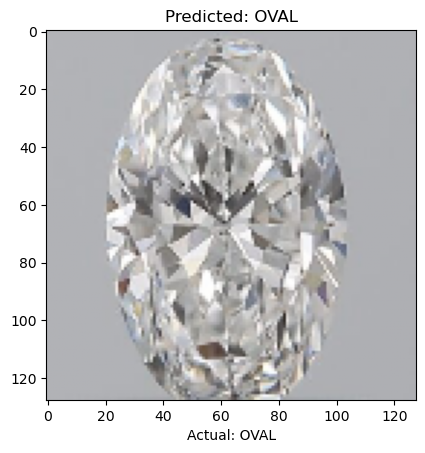

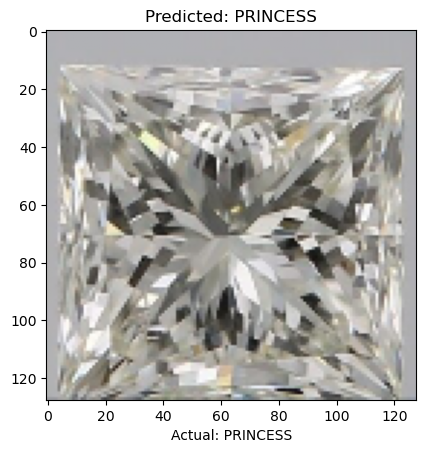

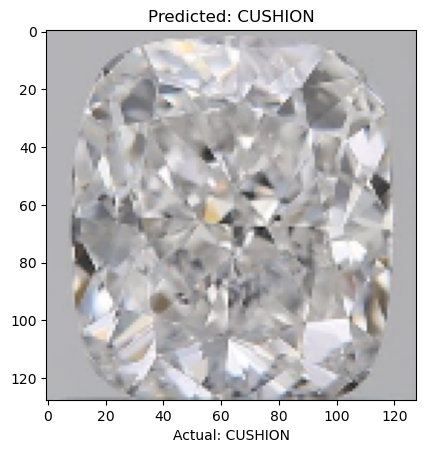

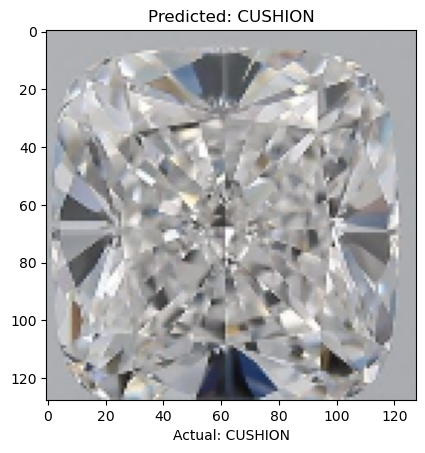

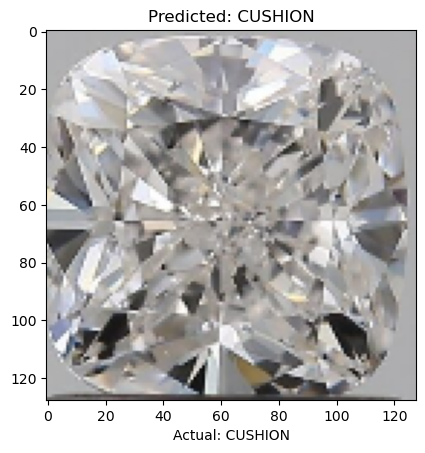

In [197]:
predictions = model.predict(X_test[:5])
predicted_classes = [np.argmax(pred) for pred in predictions]

predicted_shapes = [shape_mapping_inv[cls] for cls in predicted_classes]

for i in range(5):
    plt.imshow(X_test[i])
    plt.title("Predicted: " + str(predicted_shapes[i]))
    plt.xlabel("Actual: " + shape_mapping_inv[int(y_test_shape[i])])  # Convert to int if necessary
    plt.show()

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Colour</h4>
</div>

In [199]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(colour_mapping_inv), activation='softmax')  # Number of classes for prediction
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [200]:
#Train the model
model.fit(X_train, y_train_colour, epochs=5, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test_colour)
print('Test accuracy: ', test_acc)

Epoch 1/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 22s 184ms/step - accuracy: 0.1474 - loss: 2.4209 - val_accuracy: 0.1860 - val_loss: 2.1644
Epoch 2/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 178ms/step - accuracy: 0.2156 - loss: 2.0667 - val_accuracy: 0.2530 - val_loss: 1.8403
Epoch 3/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 182ms/step - accuracy: 0.2783 - loss: 1.9001 - val_accuracy: 0.1860 - val_loss: 2.1879
Epoch 4/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 209ms/step - accuracy: 0.2886 - loss: 1.8857 - val_accuracy: 0.2530 - val_loss: 1.8884
Epoch 5/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 18s 198ms/step - accuracy: 0.3243 - loss: 1.6769 - val_accuracy: 0.2012 - val_loss: 2.0337
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.2613 - loss: 1.9391
Test accuracy:  0.22954823076725006


<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Fluorescence</h4>
</div>

In [202]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(fluorescence_mapping_inv), activation='softmax')  # Number of classes for prediction
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [203]:
#Train the model
model.fit(X_train, y_train_fluo, epochs=5, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test_fluo)
print('Test accuracy: ', test_acc)

Epoch 1/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - accuracy: 0.6432 - loss: 1.0937 - val_accuracy: 0.6921 - val_loss: 0.9591
Epoch 2/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 180ms/step - accuracy: 0.6787 - loss: 0.9644 - val_accuracy: 0.6921 - val_loss: 0.9506
Epoch 3/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 182ms/step - accuracy: 0.6962 - loss: 0.9180 - val_accuracy: 0.6921 - val_loss: 0.9462
Epoch 4/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 182ms/step - accuracy: 0.6834 - loss: 0.9499 - val_accuracy: 0.6951 - val_loss: 0.9265
Epoch 5/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 179ms/step - accuracy: 0.6897 - loss: 0.9281 - val_accuracy: 0.6890 - val_loss: 0.9165
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6814 - loss: 0.9426
Test accuracy:  0.6849817037582397


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step


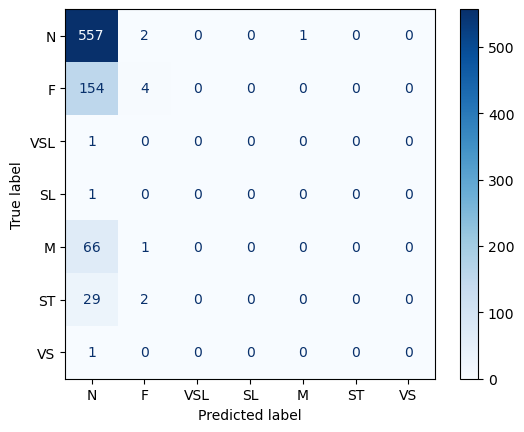

In [204]:
# predictions
y_pred_fluo = model.predict(X_test)
y_pred_fluo_classes = np.argmax(y_pred_fluo, axis=1)  # Convert predicted probabilities to class labels

# confusion matrix
conf_matrix = confusion_matrix(y_test_fluo, y_pred_fluo_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=fluorescence_mapping_inv.values())
disp.plot(cmap='Blues')  # Optional: change the color map to make it more visually appealing
plt.show()

Even though we have a fairly acceptable accuracy rate for the model, this confusion matrix shows us that the model performs very poorly because it only predicts one class (N because 70% of the dataset)



In [206]:
# Print precision, recall, and F1-score
print("Precision:", precision_score(y_test_fluo, y_pred_fluo_classes, average='weighted'))
print("Recall:", recall_score(y_test_fluo, y_pred_fluo_classes, average='weighted'))
print("F1 Score:", f1_score(y_test_fluo, y_pred_fluo_classes, average='weighted'))

# Print the full classification report
print("\nClassification Report:\n")
print(classification_report(y_test_fluo, y_pred_fluo_classes, target_names=fluorescence_mapping_inv.values()))

Precision: 0.5565136080175223
Recall: 0.684981684981685
F1 Score: 0.5656399843161456

Classification Report:

              precision    recall  f1-score   support

           N       0.69      0.99      0.81       560
           F       0.44      0.03      0.05       158
         VSL       0.00      0.00      0.00         1
          SL       0.00      0.00      0.00         1
           M       0.00      0.00      0.00        67
          ST       0.00      0.00      0.00        31
          VS       0.00      0.00      0.00         1

    accuracy                           0.68       819
   macro avg       0.16      0.15      0.12       819
weighted avg       0.56      0.68      0.57       819



As this report proves, looking at accuracy, we think we have a good model however, other metrics bring the imbalanced data problem to light.

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Overall analysis and next steps</h4>
</div>

Our model demonstrated strong performance in predicting the shape of diamonds with very satisfactory results. However, its performance was notably weaker for clarity and color predictions. 

While initial results for fluorescence prediction seemed promising, these findings may be misleading due to the limited variance observed in the fluorescence data, as highlighted during our analysis (with approximately 70% of entries being 'N' values). For the next stage, we could test out the SMOTE Oversampling technique.

For clarity, color and fluorecence, we will look into the **imbalanced data** issue in the next stage.

Overall, I am pleased with the results for shape prediction. For the next stage, I plan to conduct a more detailed evaluation of each model to better understand their strengths and weaknesses and explore potential improvements to enhance their predictive performance.

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Concluding this task</h4>
</div>



<h4 font-size:18px; ">The aim of the quality assessment task was to predict certain diamond features from images. While the task was highly successful for shape prediction, the performance for predicting color,  clarity, and fluorescence was significantly below expectations. Improving the model posed a big challenge, as it involved addressing complex issues such as image processing, feature extraction, and computer vision, which are far beyond the scope of this class. For instance, I attempted to use the SMOTE algorithm and its derivatives to address class imbalance, but this approach was unsuccessful because SMOTE does not support the treatment of 4D arrays, such as image data. Considering these challenges, I decided to discontinue this task. I am satisfied with the excellent performance achieved for shape prediction and believe that letting go of this part of the project will allow me to focus my efforts on the price prediction task, where I can deliver meaningful results.</h4>



